<a href="https://colab.research.google.com/github/SBGitHub21/Sharing_Work/blob/master/Predict_the_Spread_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Collection and Preprocessing

In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/BI_project_Covid/covid_19_data.csv',parse_dates=['Last Update'],index_col=0) 
#parsing according to the last update datetime column
#serial number as index
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#renaming certain columns

In [0]:
#used for Map later
df_confirmed = pd.read_csv("/content/drive/My Drive/BI_project_Covid/time_series_covid_19_confirmed.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

### Exploratory Data Analysis (EDA)

In [4]:
print("Rows : ",df.shape[0])
print("\nColumns : ",df.shape[1])
print("\nFeatures : ",df.columns.tolist())
print("\nMissing Values : ",df.isnull().sum().sum())
print("\nUnique values : \n", df.nunique())

Rows :  10984

Columns :  7

Features :  ['Date', 'Province/State', 'Country', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

Missing Values :  5132

Unique values : 
 Date                71
Province/State     293
Country            215
Last Update       1814
Confirmed         1613
Deaths             352
Recovered          768
dtype: int64


In [5]:
df.info() #information about the datatypes 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10984 entries, 1 to 10984
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10984 non-null  object        
 1   Province/State  5852 non-null   object        
 2   Country         10984 non-null  object        
 3   Last Update     10984 non-null  datetime64[ns]
 4   Confirmed       10984 non-null  float64       
 5   Deaths          10984 non-null  float64       
 6   Recovered       10984 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 686.5+ KB


In [6]:
print("Basic Statistics : \n",df.describe()) #metrics

Basic Statistics : 
            Confirmed        Deaths     Recovered
count   10984.000000  10984.000000  10984.000000
mean     1050.407502     43.769938    298.845776
std      6524.120490    426.967500   3051.738866
min         0.000000      0.000000      0.000000
25%         3.000000      0.000000      0.000000
50%        33.000000      0.000000      0.000000
75%       245.000000      2.000000     15.000000
max    110574.000000  13155.000000  63326.000000


In [7]:
print("Earliest Cases : \n",df.head()) 

Earliest Cases : 
            Date Province/State         Country  ... Confirmed  Deaths  Recovered
SNo                                             ...                             
1    01/22/2020          Anhui  Mainland China  ...       1.0     0.0        0.0
2    01/22/2020        Beijing  Mainland China  ...      14.0     0.0        0.0
3    01/22/2020      Chongqing  Mainland China  ...       6.0     0.0        0.0
4    01/22/2020         Fujian  Mainland China  ...       1.0     0.0        0.0
5    01/22/2020          Gansu  Mainland China  ...       0.0     0.0        0.0

[5 rows x 7 columns]


In [8]:
print("Latest Cases : \n",df.tail())

Latest Cases : 
              Date Province/State         Country  ... Confirmed  Deaths  Recovered
SNo                                               ...                             
10980  04/01/2020        Wyoming              US  ...     130.0     0.0        0.0
10981  04/01/2020       Xinjiang  Mainland China  ...      76.0     3.0       73.0
10982  04/01/2020          Yukon          Canada  ...       5.0     0.0        0.0
10983  04/01/2020         Yunnan  Mainland China  ...     182.0     2.0      172.0
10984  04/01/2020       Zhejiang  Mainland China  ...    1257.0     1.0     1226.0

[5 rows x 7 columns]


In [9]:
print("\n\t\t Date-wise number of cases in each category\n")
df.groupby('Date').sum()
#total number of Confirmed cases , Deaths and Recovery per day.


		 Date-wise number of cases in each category



,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0
...,...,...,...
03/28/2020,660706.0,30652.0,139415.0
03/29/2020,720117.0,33925.0,149082.0
03/30/2020,782365.0,37582.0,164566.0


In [10]:
print("\n\t\tMaximum number of Confirmed,Deaths and Recovered Cases\n")
df1 = df.groupby(['Country', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
df1 = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df1 = df1[df1['Date']==max(df1['Date'])].reset_index(drop=True)
df1.style.background_gradient(cmap='Pastel1')


		Maximum number of Confirmed,Deaths and Recovered Cases



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Confirmed,Deaths,Recovered
0,04/01/2020,932605.000000,46809.000000,193177.000000


In [11]:
print("\n\t\tWorld View - Country wise\n")
df_grouped = df.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
df2 = df_grouped.sort_values(by='Confirmed', ascending=False)
df2 = df2.reset_index(drop=True)
df2.style.background_gradient(cmap='summer')
#Maximum number of cases in China followed by Italy and Iran


		World View - Country wise



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country,Confirmed,Deaths,Recovered
0,Mainland China,4257799.000000,148955.000000,2459141.000000
1,Italy,1321663.000000,129684.000000,162971.000000
2,US,1300824.000000,22960.000000,27926.000000
3,Spain,846650.000000,63950.000000,125911.000000
4,Germany,666629.000000,4796.000000,87128.000000
5,Iran,575157.000000,37407.000000,188316.000000
6,France,467914.000000,25386.000000,64099.000000
7,South Korea,266905.000000,2847.000000,60094.000000
8,UK,195591.000000,11479.000000,2320.000000
9,Switzerland,172905.000000,3054.000000,12034.000000


In [12]:
print("\n\t\tChina \n")
China = df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
China
#Exploring data of china


		China 



,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,547.0,17.0,28.0
1,2020-01-23 17:00:00,639.0,18.0,30.0
2,2020-01-24 17:00:00,916.0,26.0,36.0
3,2020-01-25 17:00:00,1399.0,42.0,39.0
4,2020-01-26 16:00:00,2062.0,56.0,49.0
...,...,...,...,...
790,2020-03-28 23:11:06,81401.0,3295.0,74978.0
791,2020-03-29 23:14:06,81444.0,3300.0,75460.0
792,2020-03-30 22:58:55,81478.0,3304.0,75790.0
793,2020-03-31 23:49:27,81524.0,3305.0,76068.0


In [13]:
print("\n\t\tCountry Wise - Sorted(Alphabetically) order\n")
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()



		Country Wise - Sorted(Alphabetically) order



,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,1462.0,33.0,31.0
3,Albania,2491.0,106.0,308.0
4,Algeria,5675.0,382.0,655.0
...,...,...,...,...
210,Vietnam,3148.0,0.0,881.0
211,West Bank and Gaza,751.0,7.0,124.0
212,Zambia,230.0,0.0,0.0
213,Zimbabwe,61.0,10.0,0.0


### Visualisation

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [15]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
#steep rise in confirmed cases around 12th March 2020. Reason could be more tests and results 
#available 

In [0]:
n = 5
c_lrgst = df_grouped.Confirmed.nlargest(n)
d_lrgst = df_grouped.Deaths.nlargest(n)
r_lrgst = df.Recovered.nlargest(n)

top_5 = df_grouped.query('Confirmed in @c_lrgst')

In [17]:
fig = go.Figure()   
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=top_5['Country'], 
                         y=top_5['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Top 5 Countries with Corona Virus Cases (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()
#China cases far more than the other top 5 countries

In [18]:
import plotly.graph_objects as go
import numpy as np
z = np.random.poisson(size=(len(China['Confirmed']), len(China['Last Update'])))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=China['Last Update'],
        y=China['Confirmed'],
        colorscale='fall'))

fig.update_layout(
    title='China - Number of Cases per day',
    xaxis_nticks=5)

fig.show()

#Cases are still increasing . No notion of decrease till now.

In [19]:
import plotly.express as px
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=1,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered',
                  font=dict(family="Courier New, monospace",
                            size=14,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) #tight layout - right , top, left , below


fig.show()
#trend of spread and at what rate. Huge jump in March

### Forecasting / Prediction

#### Prophet Algorithm

#### Worldwide - Confirmed Cases

In [0]:
from fbprophet import Prophet

In [21]:
#Fixing data for forecasting
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed['cap']= 10000000
confirmed.head()

,ds,y,cap
0,2020-01-22,555.0,10000000
1,2020-01-23,653.0,10000000
2,2020-01-24,941.0,10000000
3,2020-01-25,1438.0,10000000
4,2020-01-26,2118.0,10000000


In [22]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,growth='logistic')
m.fit(confirmed)
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31
131,2020-06-01


In [23]:
future['cap']=10000000
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
127,2020-05-28,7.927155e+06,7.922578e+06,7.931587e+06
128,2020-05-29,7.460269e+06,7.455375e+06,7.464777e+06
129,2020-05-30,6.959954e+06,6.955194e+06,6.964449e+06
130,2020-05-31,6.436253e+06,6.431556e+06,6.441030e+06
131,2020-06-01,5.901951e+06,5.897277e+06,5.906492e+06


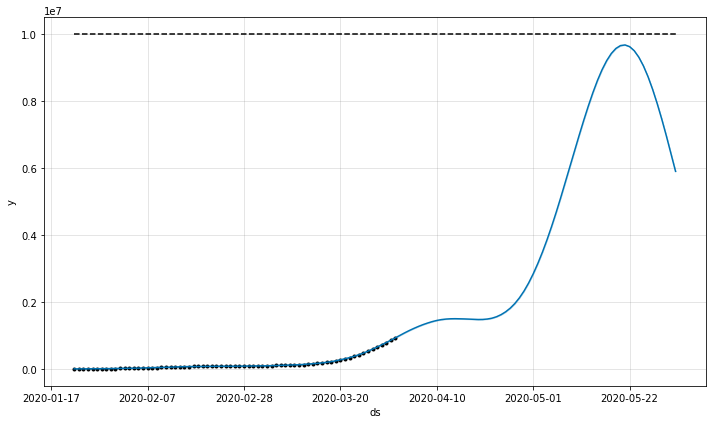

In [24]:
fig1 = m.plot(forecast)

In [0]:
#help(Prophet)

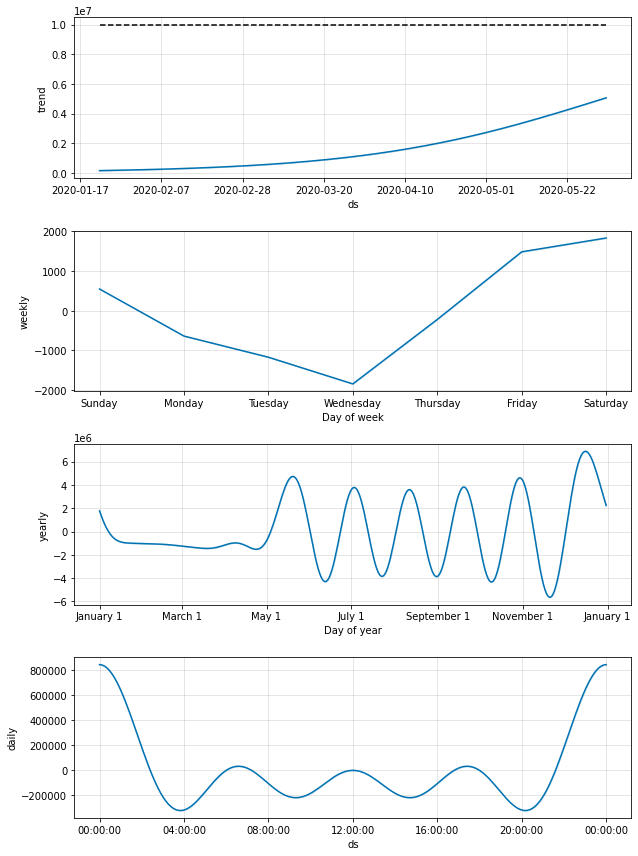

In [26]:
m.plot_components(forecast);

#### Worldwide - Deaths

In [0]:
#fixing data
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [28]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(deaths)
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31
131,2020-06-01


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
127,2020-05-28,776561.239787,775834.052482,777149.468404
128,2020-05-29,671867.984909,671188.882505,672457.298074
129,2020-05-30,563038.906988,562298.219232,563633.931907
130,2020-05-31,451423.989756,450698.025716,452056.029493
131,2020-06-01,338589.685344,337828.129471,339193.554830


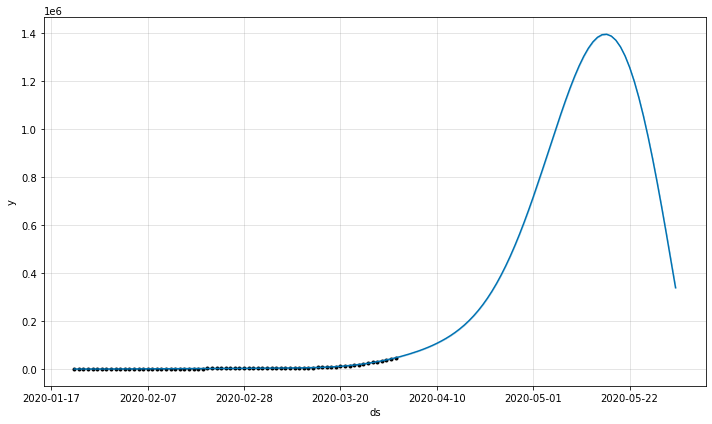

In [30]:
fig1 = m.plot(forecast)

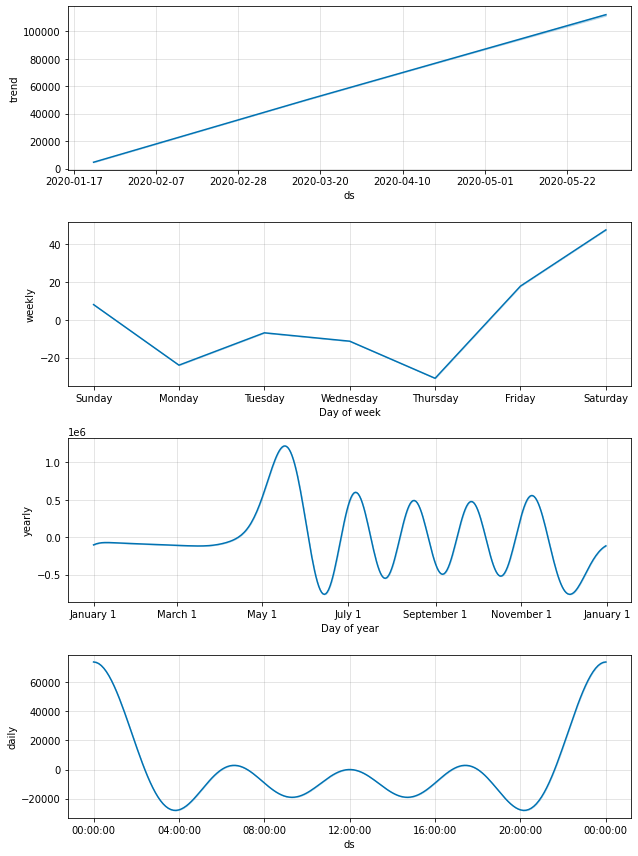

In [31]:
m.plot_components(forecast);

#### Worldwide - Recovery

In [0]:
#fixing data
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [33]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(recovered)
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31
131,2020-06-01


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
127,2020-05-28,108137.423041,87106.724103,128513.832478
128,2020-05-29,-681.022901,-22706.175410,20571.700400
129,2020-05-30,-98948.426575,-121430.567467,-77604.965592
130,2020-05-31,-185762.723778,-209083.758189,-163811.702518
131,2020-06-01,-259534.765967,-283450.230261,-236900.905797


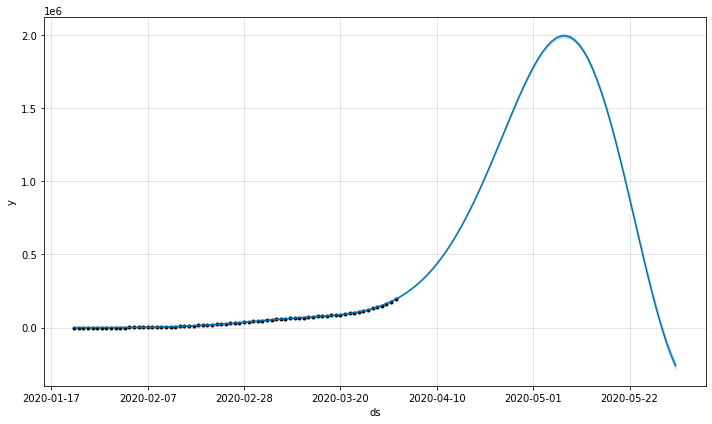

In [35]:
fig1 = m.plot(forecast)

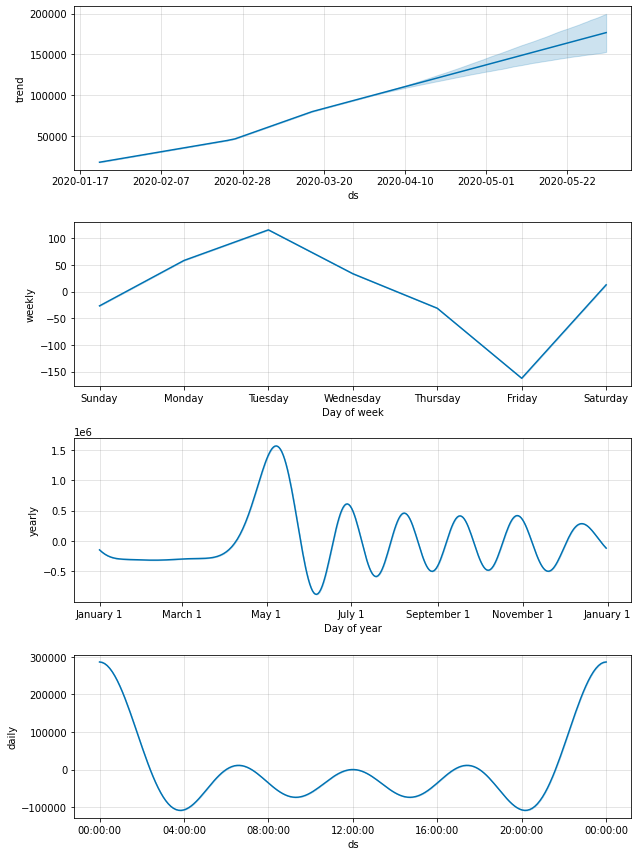

In [36]:
m.plot_components(forecast);